# PROGRAMA 2

## Objetivo:
- Implementación de una red neuronal para la detección de ciberacoso a partir de una recopilación de tweets (actualmente X's).erior uso.

## Tratamiento y visualización de los datos

In [1]:
#Importación de los datos
import pandas as pd
data_train = pd.read_csv('E:\MATERIAS CURSADAS\ONCEAVO SEMESTRE\PLN\cyberbullying_train.csv')
data_test = pd.read_csv('E:\MATERIAS CURSADAS\ONCEAVO SEMESTRE\PLN\cyberbullying_test.csv')
data_valid = pd.read_csv('E:\MATERIAS CURSADAS\ONCEAVO SEMESTRE\PLN\cyberbullying_val.csv')

data_train.head()

,tweet_text,cyberbullying_type
0,@AntonSirius @erinspice @prpltnkr @ChiefElk oh...,other_cyberbullying
1,"Ladies ""Bedroom Bully"" The Mix Cd By @GappyRan...",not_cyberbullying
2,RT @_bobbidana: Never thought I'd say this but...,not_cyberbullying
3,She is intellectual terrorists and world suffe...,religion
4,You saudias are not friends of Muslim idiots c...,religion


In [2]:
data_test.head()

,tweet_text,cyberbullying_type
0,"@dankmtl Yeap, as a little Propaganda Nazi for...",religion
1,@LyndseyBoo wow!! Leave lyndsey phone alone!!!...,other_cyberbullying
2,"I'm not a man, only know how to bully people :(",other_cyberbullying
3,@urgedharry @nyazpolitics @greenlinerzjm If yo...,religion
4,Calling people dumb isnt nice :( RT @tayyoung_...,ethnicity


In [3]:
data_valid.head()

,tweet_text,cyberbullying_type
0,But you idiot tagged and more also I'm a Muslim,religion
1,@SEXYLALA That's a dumb nigger never fuck LALA...,ethnicity
2,I never hear hispanics calling each other brow...,ethnicity
3,@Lenny_Banx nigger read it again such a dumb a...,ethnicity
4,She was a mean girl in high school. She and Mi...,age


In [4]:
#Bibliotecas necesarias
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # Disable tensorflow debugging logs
os.environ["KERAS_BACKEND"] = "torch"
import keras
import torch

torch.__version__, keras.__version__

('2.4.1+cpu', '3.5.0')

Para el tratamiento de los datos se eliminaron cadenas vacías, textos repetidos así como la puntuación y caracteres especiales dado que se trataba de tweets, los cuales llegan a tener emojis. No se tuvo que modificar de alguna manera las columnas ni separación de archivos dado que ya viene separado por definición en conjuntos de entrenamiento, prueba y evaluación.

- Verificación de cadenas vacías

In [5]:
cv_train = data_train['tweet_text'].isna().sum()
cv_test = data_test['tweet_text'].isna().sum()
cv_val = data_valid['tweet_text'].isna().sum()

print(cv_train, cv_test, cv_val)

0 0 0


In [6]:
len(data_train)

33384

- Eliminación de duplicados

In [7]:
data_train = data_train.drop_duplicates(subset=['tweet_text'])
len(data_train)

32534

In [8]:
data_test = data_test.drop_duplicates(subset=['tweet_text'])
len(data_test)

7119

In [9]:
data_valid = data_valid.drop_duplicates(subset=['tweet_text'])
len(data_valid)

7118

In [10]:
data_train.sort_values(by='tweet_text', ascending=True, inplace=False)

,tweet_text,cyberbullying_type
17111,&amp; you might not get ya bitch back &amp; t...,gender
2125,@rhythmixx_ :hobbies include: fighting Mariam,other_cyberbullying
16387,I fucking hate you,gender
4867,Keeks is a bitch she curves everyone lol I w...,gender
26032,Murda Gang bitch its Gang Land,other_cyberbullying
...,...,...
31103,💕💕 the smell of blocks in the morning 💕💕,other_cyberbullying
30583,💩,other_cyberbullying
17401,😂😂😂 shame @ kat &amp; andre #MKR,not_cyberbullying
24219,😂😂😂😂😂,gender


- Eliminar cadenas de espacios

In [11]:
data_train = data_train[data_train['tweet_text'].str.strip() != '']
data_train

,tweet_text,cyberbullying_type
0,@AntonSirius @erinspice @prpltnkr @ChiefElk oh...,other_cyberbullying
1,"Ladies ""Bedroom Bully"" The Mix Cd By @GappyRan...",not_cyberbullying
2,RT @_bobbidana: Never thought I'd say this but...,not_cyberbullying
3,She is intellectual terrorists and world suffe...,religion
4,You saudias are not friends of Muslim idiots c...,religion
...,...,...
33378,Just asking which people on the planet weren't...,ethnicity
33379,Missing school for the Grey Cup festivall at N...,not_cyberbullying
33380,"Seriously, ""lady"" is what my mom calls her clo...",gender
33381,"Same as religion, one rule for muslims ,one ru...",religion


In [12]:
data_test = data_test[data_test['tweet_text'].str.strip() != '']
data_test

,tweet_text,cyberbullying_type
0,"@dankmtl Yeap, as a little Propaganda Nazi for...",religion
1,@LyndseyBoo wow!! Leave lyndsey phone alone!!!...,other_cyberbullying
2,"I'm not a man, only know how to bully people :(",other_cyberbullying
3,@urgedharry @nyazpolitics @greenlinerzjm If yo...,religion
4,Calling people dumb isnt nice :( RT @tayyoung_...,ethnicity
...,...,...
7149,@gameragodzilla @Totalbiscuit @Grummz @BenKuch...,other_cyberbullying
7150,Everyone upset about Amy Schumer's gay jokes s...,gender
7151,The way that every pyramid scheme girl was a b...,age
7152,bro you can bully the kids at school but you c...,age


In [13]:
data_valid = data_valid[data_valid['tweet_text'].str.strip() != '']
data_valid

,tweet_text,cyberbullying_type
0,But you idiot tagged and more also I'm a Muslim,religion
1,@SEXYLALA That's a dumb nigger never fuck LALA...,ethnicity
2,I never hear hispanics calling each other brow...,ethnicity
3,@Lenny_Banx nigger read it again such a dumb a...,ethnicity
4,She was a mean girl in high school. She and Mi...,age
...,...,...
7149,haha.erdogan started syrian conflict or the we...,religion
7150,@discerningmumin That's idiotic. Not holding a...,religion
7151,This is way past George Floyd. Everyone is agr...,ethnicity
7152,I'm not important. The things I'm working on a...,other_cyberbullying


- Se elimina toda la puntuación 

In [14]:
import string

In [15]:
data_train['tweet_text'] = data_train['tweet_text'].str.lower().str.translate(str.maketrans('', '', string.punctuation))
data_train.head()

,tweet_text,cyberbullying_type
0,antonsirius erinspice prpltnkr chiefelk oh dea...,other_cyberbullying
1,ladies bedroom bully the mix cd by gappyranks ...,not_cyberbullying
2,rt bobbidana never thought id say this but i h...,not_cyberbullying
3,she is intellectual terrorists and world suffe...,religion
4,you saudias are not friends of muslim idiots c...,religion


In [16]:
data_test['tweet_text'] = data_test['tweet_text'].str.lower().str.translate(str.maketrans('', '', string.punctuation))
data_test.head()

,tweet_text,cyberbullying_type
0,dankmtl yeap as a little propaganda nazi for t...,religion
1,lyndseyboo wow leave lyndsey phone alone bully...,other_cyberbullying
2,im not a man only know how to bully people,other_cyberbullying
3,urgedharry nyazpolitics greenlinerzjm if you a...,religion
4,calling people dumb isnt nice rt tayyoung fuc...,ethnicity


In [17]:
data_valid['tweet_text'] = data_valid['tweet_text'].str.lower().str.translate(str.maketrans('', '', string.punctuation))
data_valid.head()

,tweet_text,cyberbullying_type
0,but you idiot tagged and more also im a muslim,religion
1,sexylala thats a dumb nigger never fuck lala h...,ethnicity
2,i never hear hispanics calling each other brow...,ethnicity
3,lennybanx nigger read it again such a dumb ass...,ethnicity
4,she was a mean girl in high school she and mim...,age


## Pipeline

En esta parte del código hacemos uso de los vectores ONE-HOT para la vectorización de los textos y categorías para que la red neuronal pueda procesar. Cada valor de una categoría se convierte en un vector binario de longitud igual al número de categorías posibles, donde solo una posición es 1 (indicando la categoría a la que pertenece el valor), y todas las demás posiciones son 0.

- Clasificación en clases de los tipos de twwets que tenemos

In [18]:
#Uso de tf.data para la clasificación de clases a partir de vectores ONE-HOT
import tensorflow as tf

#Vectores ONE-HOT del conjunto de entrenamiento, prueba y validación
vector_train = data_train['cyberbullying_type']
vector_test = data_test['cyberbullying_type']
vector_val = data_valid['cyberbullying_type']

def mapeo_one_hot(vectores):
    categorias = list(set(vectores))
    valor_categorias = {vectores: index for index, vectores in enumerate(categorias)}

    indices = [valor_categorias[vector] for vector in vectores]

    one_hot = tf.one_hot(indices, depth=len(categorias))

    return one_hot

one_hot_train = mapeo_one_hot(vector_train)
one_hot_test = mapeo_one_hot(vector_test)
one_hot_val = mapeo_one_hot(vector_val)

print(one_hot_train.numpy())

[[0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


Aquí se produce la separación en los conjuntos de datos ya convertidos en vectores ONE-HOT.

In [19]:
import tensorflow as tf
from keras.layers import TextVectorization
import time

X_train = data_train['tweet_text'].values
y_train = one_hot_train

x_test = data_test['tweet_text'].values
y_test = one_hot_test

x_val = data_valid['tweet_text'].values
y_val = one_hot_val

In [20]:
len(X_train), len(x_test), len(x_val)

(32534, 7119, 7118)

In [21]:
raw_train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
raw_test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
raw_val_ds = tf.data.Dataset.from_tensor_slices((x_val, y_val))

Para el ejercicio se usó un tamaño de volabulario de 10,000 para la entrada del modelo, esto para tener el espacio suficiente de todos las posibles cadenas que puedan contener los datatsets.

In [22]:
# Tamaño de vocabulario
vocab_size = 10000

vectorize_layer = TextVectorization(
    standardize=None,
    max_tokens=vocab_size,
    output_mode='tf-idf')

# Obtener el texto sin etiquetas
text_ds = raw_train_ds.map(lambda x, y: x)
start = time.time()
vectorize_layer.adapt(text_ds)
print(f'Time for adapt is {time.time()-start:.4f}')

Time for adapt is 175.0320


Para mejor entrenamiento del modelo se optó por usar lotes de tamaño 64, más grandes para que el modelo pudiese detectar patrones más complejos o no ignorará posibles datos que ayudan a taner mejores estadísticas de resultados.

In [23]:
batch_size = 64
raw_train_ds = raw_train_ds.shuffle(20000).batch(batch_size)
raw_test_ds = raw_test_ds.batch(batch_size)
raw_val_ds = raw_val_ds.batch(batch_size)

In [24]:
for inp, target in raw_train_ds.take(1):
    print(inp[:2], target[:2])

tf.Tensor(
[b'watching wadhwa claim that he never received financial compensation oh sweets we know this isnt how that works stopwadhwa2015'
 b'i remember the shame and anxiety i felt about telling my family and friends i was straight in high school a classmate caught me holding hands with a girl and told the whole school i was straight i was bullied mercilessly i still remember every joke and insult 10 years later'], shape=(2,), dtype=string) tf.Tensor(
[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]], shape=(2, 6), dtype=float32)


In [25]:
vectorize_layer(inp)

tensor([[7.7002, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 2.4530, 2.6519,  ..., 0.0000, 0.0000, 0.0000],
        [7.7002, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [7.7002, 0.0000, 2.6519,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 1.2265, 1.3260,  ..., 0.0000, 0.0000, 0.0000]])

In [26]:
def preprocess(x, y):
    x = vectorize_layer(x)
    return x, y

train_ds = raw_train_ds.map(lambda x, y: preprocess(x, y))
val_ds = raw_val_ds.map(lambda x, y: preprocess(x, y))
test_ds = raw_test_ds.map(lambda x, y: preprocess(x, y))

In [27]:
next(iter(train_ds))

(<tf.Tensor: shape=(64, 10000), dtype=float32, numpy=
 array([[23.10065  ,  1.2264812,  1.3259579, ...,  0.       ,  0.       ,
          0.       ],
        [ 0.       ,  4.905925 ,  0.       , ...,  0.       ,  0.       ,
          0.       ],
        [ 0.       ,  1.2264812,  1.3259579, ...,  0.       ,  0.       ,
          0.       ],
        ...,
        [15.400434 ,  2.4529624,  2.6519158, ...,  0.       ,  0.       ,
          0.       ],
        [ 7.700217 ,  1.2264812,  0.       , ...,  0.       ,  0.       ,
          0.       ],
        [ 7.700217 ,  0.       ,  0.       , ...,  0.       ,  0.       ,
          0.       ]], dtype=float32)>,
 <tf.Tensor: shape=(64, 6), dtype=float32, numpy=
 array([[0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 

- Construcción del modelo de red neuronal.

Para esta capa personalizada 'Linear' definimos los siguientes puntos principales:

- *Inicialización*: Define cuántas unidades de salida (neuronas) tendrá la capa, y si tiene una función de activación.
- *Construcción de pesos*: Crea una matriz de pesos w (que conecta las entradas con las salidas) y un vector de sesgos b.
- *Cálculo hacia adelante*: Durante la pasada hacia adelante, la capa realiza la operación matemática inputs * w + b y aplica la función de activación si está definida.

La idea básicamente de trata de construir nuestro propio modelo en donde los pesos se calculan a medida que ocurren las iteraciones.

In [28]:
class Linear(keras.layers.Layer):
    def __init__(self, num_outputs, activation=None):
        super().__init__()
        self.num_outputs = num_outputs
        self.activation = keras.activations.get(activation)

    def build(self, input_shape):
      input_dim = input_shape[-1]
      self.w = self.add_weight(shape=[input_dim,
                                      self.num_outputs],
                               name = 'kernel')
      self.b = self.add_weight(shape=[self.num_outputs],
                               name = 'bias')

    def call(self, inputs):
      x = keras.ops.matmul(inputs, self.w) + self.b
      return self.activation(x)

In [29]:
test_batch = next(iter(test_ds))
test_batch[0]

<tf.Tensor: shape=(64, 10000), dtype=float32, numpy=
array([[ 7.700217 ,  1.2264812,  1.3259579, ...,  0.       ,  0.       ,
         0.       ],
       [23.10065  ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  1.3259579, ...,  0.       ,  0.       ,
         0.       ],
       ...,
       [15.400434 ,  0.       ,  1.3259579, ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  1.3259579, ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  1.2264812,  0.       , ...,  0.       ,  0.       ,
         0.       ]], dtype=float32)>

In [30]:
val_batch = next(iter(val_ds))
val_batch[0]

<tf.Tensor: shape=(64, 10000), dtype=float32, numpy=
array([[ 0.       ,  0.       ,  1.3259579, ...,  0.       ,  0.       ,
         0.       ],
       [15.400434 ,  0.       ,  1.3259579, ...,  0.       ,  0.       ,
         0.       ],
       [15.400434 ,  2.4529624,  1.3259579, ...,  0.       ,  0.       ,
         0.       ],
       ...,
       [ 0.       ,  0.       ,  1.3259579, ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [15.400434 ,  1.2264812,  1.3259579, ...,  0.       ,  0.       ,
         0.       ]], dtype=float32)>

Definición del modelo:

- Tenemos 5 capas densas en donde la función de activación es utilizada para evitar relaciones lineales y que el modelo sea capaz de encontrar patrones más complejos y se aproveche de mejor manera su estructura.

- Después de las primeras cuatro capas densas, se aplica Dropout con una tasa del 50%. Esto significa que, durante el entrenamiento, el modelo apaga aleatoriamente la mitad de las neuronas en esas capas, lo que ayuda a evitar el sobreajuste.

- La última capa, que tiene 6 unidades, no utiliza Dropout y se usa como salida del modelo. utilizamos 'softmax' al tratarse de múltiples categorías o etiquetas.


In [41]:
from tensorflow.keras.layers import Dropout 

class Model(keras.Model):
    def __init__(self, activation):
        super().__init__()
        self.l1 = Linear(24, activation=activation)
        self.dropout1 = Dropout(0.5)
        self.l2 = Linear(18)
        self.dropout2 = Dropout(0.5)
        self.l3 = Linear(18, activation=activation)
        self.dropout3 = Dropout(0.5)
        self.l4 = Linear(12)
        self.dropout4 = Dropout(0.5)
        self.l5 = Linear(6, activation=activation)
     

    def call(self, x):
        x = self.dropout1(self.l1(x))
        x = self.dropout2(self.l2(x))
        x = self.dropout3(self.l3(x))
        x = self.dropout4(self.l4(x))
        x = self.l5(x)
        return x

model = Model('softmax')

In [42]:
model(test_batch[0]).shape, test_batch[1].shape

(torch.Size([64, 6]), TensorShape([64, 6]))

- Contrucción del entrenamiento, prueba y validación del modelo.

Callbacks:

- *EarlyStopping*: Detiene el entrenamiento cuando la mejora del modelo en los datos de validación se estanca. Monitorea la métrica 'val_loss' (pérdida en el conjunto de validación). patience=4: Si la pérdida de validación no mejora después de 4 épocas consecutivas, el entrenamiento se detiene. 

- *ModelCheckpoint*: Guarda el mejor modelo durante el entrenamiento según un criterio especificado (en este caso, la pérdida de validación). Guarda el modelo en el archivo 'best_model.keras' cada vez que la pérdida de validación mejore. save_best_only=True: Solo guarda el modelo si es mejor que el guardado anteriormente, asegurando que al final se tenga el modelo con el mejor desempeño en el conjunto de validación.


Compile:

- *optimizer=keras.optimizers.Adam()*: Se usa el optimizador Adam, que es un optimizador avanzado que ajusta la tasa de aprendizaje automáticamente.

- *loss='categorical_crossentropy'*: Se utiliza la función de pérdida de entropía cruzada categórica, lo cual es apropiado para problemas de clasificación multiclase ( especial para cuando las etiquetas están en formato de una codificación one-hot).


Fit:

- *validation_data=val_ds*: Se proporciona un conjunto de validación (val_ds) para monitorear el desempeño del modelo en datos que no ha visto durante el entrenamiento.

- *EarlyStopping* podría detener el entrenamiento antes de las 15 épocas si la pérdida de validación no mejora.

- *ModelCheckpoint* guardará el mejor modelo en el archivo 'best_model.keras'.


Predict:

- *test_ds*: El conjunto de datos de prueba, que se usa para generar predicciones con el modelo.

- El modelo predice las etiquetas del conjunto de prueba, y las predicciones se almacenan en y_pred_score.


Evaluate:

- Evalúa el modelo en el conjunto de datos de prueba (test_ds) usando el tamaño de lote especificado (test_batch).

- Se evalúan tanto la pérdida como la métrica de exactitud en los datos de prueba, proporcionando una indicación de cuán bien generaliza el modelo en datos no vistos.


Este flujo garantiza que el modelo se entrene de manera eficiente, evite sobreajuste y guarde el mejor modelo basado en su desempeño en el conjunto de validación.

In [43]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Definir los callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=4),  # Detener cuando la pérdida de validación no mejore por 3 épocas consecutivas.
    ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True)  # Guardar el mejor modelo.
]

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
    callbacks=callbacks,
    batch_size=val_batch
)

y_pred_score = model.predict(
    test_ds,
    callbacks=callbacks
)


model.evaluate(
    test_ds,
    batch_size=test_batch
)

Epoch 1/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.2781 - loss: 1.6150 - val_accuracy: 0.5861 - val_loss: 0.9277
Epoch 2/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.6717 - loss: 0.7575 - val_accuracy: 0.7817 - val_loss: 0.5685
Epoch 3/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.8113 - loss: 0.4188 - val_accuracy: 0.7942 - val_loss: 0.5326
Epoch 4/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - accuracy: 0.8827 - loss: 0.3056 - val_accuracy: 0.8186 - val_loss: 0.5462
Epoch 5/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - accuracy: 0.9322 - loss: 0.2141 - val_accuracy: 0.8105 - val_loss: 0.6048
Epoch 6/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - accuracy: 0.9571 - loss: 0.1464 - val_accuracy: 0.8044 - val_loss: 0.7019
Epoch 7/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - accuracy: 0.9714 - loss: 0.1065 - val_accuracy: 0.8016 - val_loss: 0.7896
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accu

[0.7792901396751404, 0.8051692843437195]

In [44]:
history.history

{'accuracy': [0.3833220601081848,
  0.7162045836448669,
  0.8206799030303955,
  0.890114963054657,
  0.9325013756752014,
  0.9549701809883118,
  0.969416618347168],
 'loss': [1.3487401008605957,
  0.6652806997299194,
  0.39997681975364685,
  0.29625457525253296,
  0.20852991938591003,
  0.14724509418010712,
  0.10585064440965652],
 'val_accuracy': [0.5861197113990784,
  0.7816802263259888,
  0.7941837310791016,
  0.8186288475990295,
  0.8104804754257202,
  0.8044394254684448,
  0.8016296625137329],
 'val_loss': [0.927668571472168,
  0.5684754252433777,
  0.5325837135314941,
  0.5461812615394592,
  0.6048155426979065,
  0.7018797993659973,
  0.7896044850349426]}

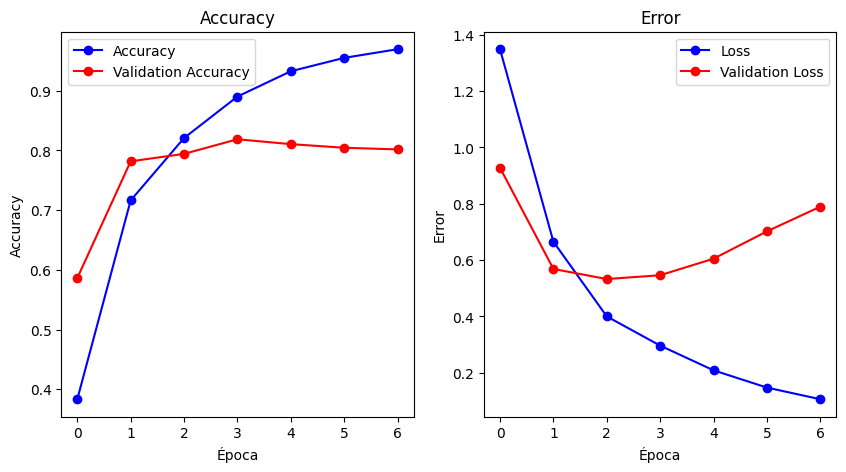

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot de accuracy en el primer subplot
ax1.plot(history.history['accuracy'], 'bo-', label='Accuracy')
ax1.plot(history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
ax1.set_title('Accuracy')
ax1.set_xlabel('Época')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot de error en el segundo subplot
ax2.plot(history.history['loss'], 'bo-', label='Loss')
ax2.plot(history.history['val_loss'], 'ro-', label='Validation Loss')
ax2.set_title('Error')
ax2.set_xlabel('Época')
ax2.set_ylabel('Error')
ax2.legend()

# Mostrar figura
plt.show()

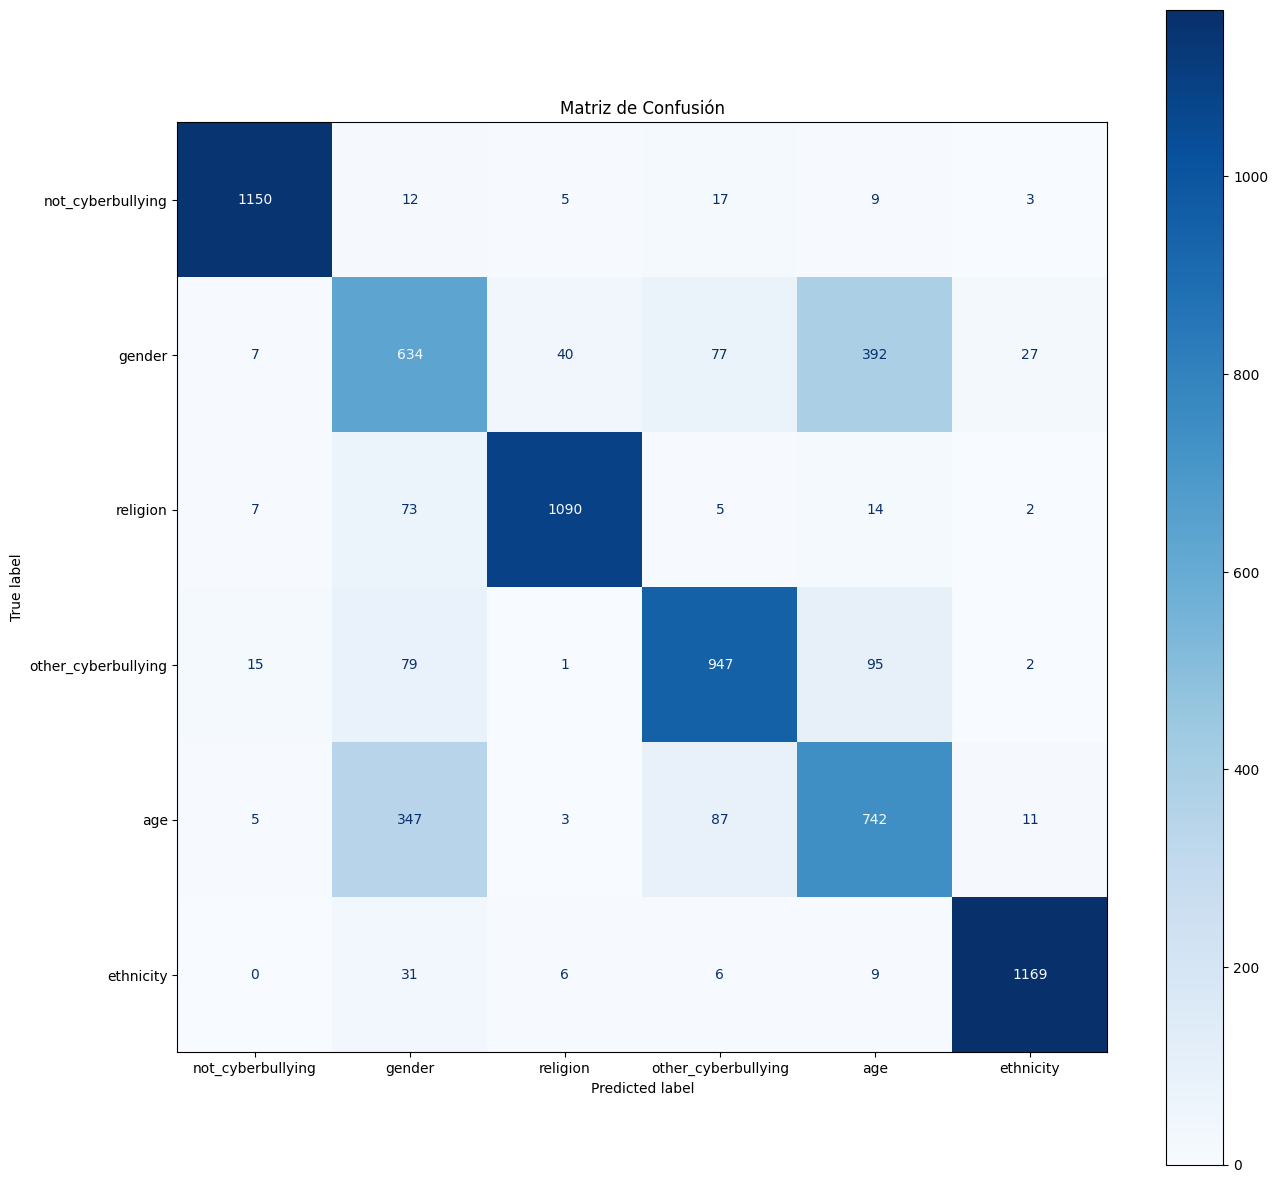

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = np.argmax(y_pred_score, axis=1)
y_true = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred)

nombres_clase = ['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying', 'age', 'ethnicity']

plt.figure(figsize=(15,15))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=nombres_clase)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title("Matriz de Confusión")
plt.show()

## Conslusión

Finalmente puedo decir que el objetivo de la programa se cumplió dado que la red neuronal si es capaz de clasificar las categorías descritas en los conjuntos de datos y donde se utilizaron los siguientes elementos:

- Funciones de pérdida.
- Funciones de activación.
- Optimizadores.

El procesamiento de texto no fue una tarea complicado debido a que el dataset venía mejor balanceado y solo contaba con dos columnas.

El diseño de la arquitectura resultó fundamental para alcanzar el accuracy actual, esto debido a que el uso de las capas dropout evita el sobreajuste, que en otras palabras es que aumente el accuracy de entrenamiento pero disminuya el de validación no proporcionalmente, así que de esta manera fue posible obtener mejores resultados.

Dentro del entrenamiento el callback es fundamental, pues de nada sirve un modelo que aumenta en accuracy pero que aumenta su pérdida, por lo que no entrenar todas las épocas si no es necesario es otro acierto dentro de este código.

En conclusión, la iteración de esta red neuronal es buena, tal vez no alcanzó el 0.83; sin embargo, se acercó bastante con un 0.81, en dónde algunos detalles en específico podrían darnos incluso mejores resultados. Me gustó el ejercicio y pienso que es muy importante seguir con este tipo de arquitecturas para tener una mejor respuesta.